In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
# Fig.1
df.nunique().reset_index().rename(columns={"index":"Column Name",0:"unique values"})

,Column Name,unique values
0,User_ID,5891
1,Product_ID,3631
2,Gender,2
3,Age,7
4,Occupation,21
5,City_Category,3
6,Stay_In_Current_City_Years,5
7,Marital_Status,2
8,Product_Category_1,20
9,Product_Category_2,17


### Handle missing data

In [4]:
# Fig.2

# get total count of data including missing data
total = df.isnull().sum().sort_values(ascending=False)

# get percent of missing data relevant to all data
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


In [5]:
df = df.drop('Product_Category_3', axis=1)

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Product_Category_2'] = imputer.fit_transform(pd.DataFrame(df['Product_Category_2']))
df['Product_Category_2'] = np.round(df['Product_Category_2']).astype(int)

### Detect outliers

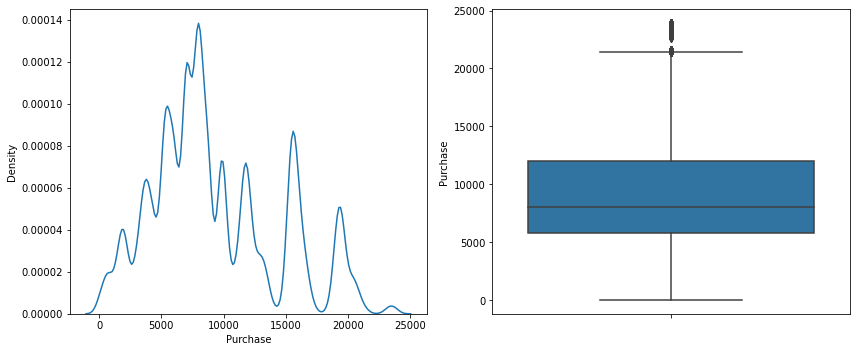

In [7]:
# Fig.3

# Generate a line chart and box plot to detect outliers in purchase.
fig, ax = plt.subplots(1, 2, figsize=(12,5)) 

sns.kdeplot(x = 'Purchase', data = df, ax = ax[0]) 
sns.boxplot(y = 'Purchase', data = df, ax = ax[1]) 
plt.tight_layout() 
plt.show()

In [8]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

Lower_Whisker = Q1 -  1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
df = df[df['Purchase'] < Upper_Whisker]

# 3 Analyses

## Question 1

### Generate six histograms to present the distribution of customers’ demographics information

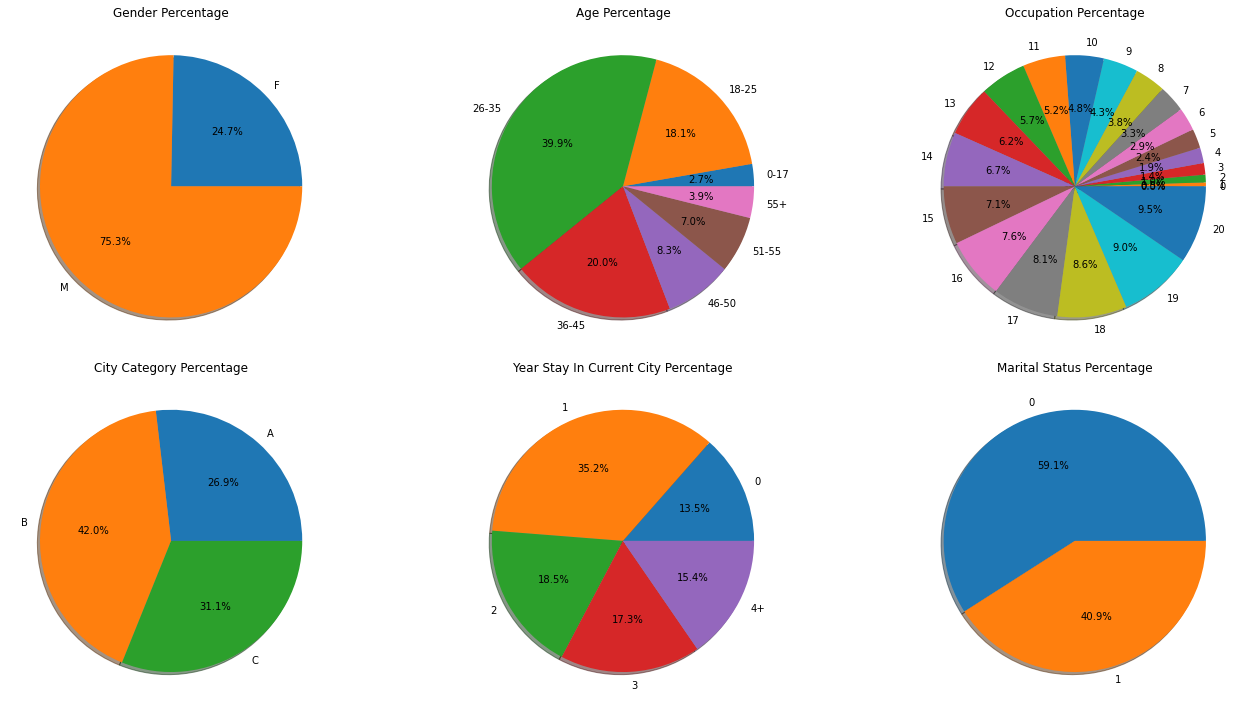

In [9]:
# Fig.4

plt.figure(figsize = (20,10))

######## Gender ######### 
data_Sex = df.groupby('Gender')['Gender'].count()
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.subplot(231)
plt.pie(data_Sex['Count'], labels = data_Sex['Sex'], autopct='%1.1f%%', shadow=True)
plt.title('Gender Percentage')

######## Age ######### 
data_Age = df.groupby('Age')['Age'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
plt.subplot(232)
plt.pie(data_Age['Count'], labels = data_Age['Age'], autopct='%1.1f%%', shadow=True)
plt.title('Age Percentage')

######## Occupation ######### 
data_Occupation = df.groupby('Occupation')['Occupation'].count()
data_Occupation = pd.DataFrame({'Occupation':data_Occupation.index, 'Count':data_Occupation.values})
plt.subplot(233)
plt.pie(data_Occupation['Occupation'], labels = data_Occupation['Occupation'], autopct='%1.1f%%', shadow=True)
plt.title('Occupation Percentage')

######## City ######### 
data_City = df.groupby('City_Category')['City_Category'].count()
data_City = pd.DataFrame({'City_Category':data_City.index, 'Count':data_City.values})
plt.subplot(234)
plt.pie(data_City['Count'], labels = data_City['City_Category'], autopct='%1.1f%%', shadow=True)
plt.title('City Category Percentage')

######## Years in city ######### 
data_Years = df.groupby('Stay_In_Current_City_Years')['Stay_In_Current_City_Years'].count()
data_Years = pd.DataFrame({'Stay_In_Current_City_Years':data_Years.index, 'Count':data_Years.values})
plt.subplot(235)
plt.pie(data_Years['Count'], labels = data_Years['Stay_In_Current_City_Years'], autopct='%1.1f%%', shadow=True)
plt.title('Year Stay In Current City Percentage')

######## Marital_Status ######### 
data_martial = df.groupby('Marital_Status')['Marital_Status'].count()
data_martial = pd.DataFrame({'Marital_Status':data_martial.index, 'Count':data_martial.values})
plt.subplot(236)
plt.pie(data_martial['Count'], labels = data_martial['Marital_Status'], autopct='%1.1f%%', shadow=True)
plt.title('Marital Status Percentage')

plt.tight_layout() 
plt.show()


In [10]:
malesPurchaserData = df.loc[df['Gender'] == 'M']
malesPurchaseMean = round(np.mean(malesPurchaserData['Purchase']), 2)
print("Purchase mean for male purchasers = ",malesPurchaseMean)

femalsPurchaserData = df.loc[df['Gender'] == 'F']
femalsPurchaseMean = round(np.mean(femalsPurchaserData['Purchase']), 2)
print("Purchase mean for femal purchasers = ",femalsPurchaseMean)

Purchase mean for male purchasers =  9367.72
Purchase mean for femal purchasers =  8671.05


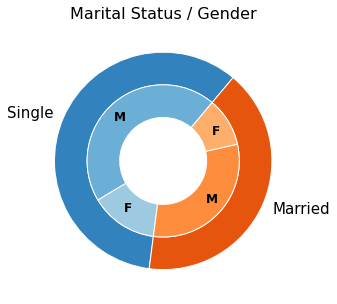

In [11]:
# Fig.5

out_vals = df.Marital_Status.value_counts()
in_vals = np.array([df[df.Marital_Status==x]['Gender'].value_counts() for x in [0,1]]).flatten()

fig, ax = plt.subplots(figsize=(5, 5))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6]))

ax.pie(out_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Single', 'Married'],
       textprops={'fontsize': 15}, startangle=50)

ax.pie(in_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['M', 'F', 'M', 'F'],
       labeldistance=0.75, textprops={'fontsize': 12, 'weight': 'bold'}, startangle=50)

ax.set(aspect="equal")
plt.title('Marital Status / Gender', fontsize=16)
plt.show()

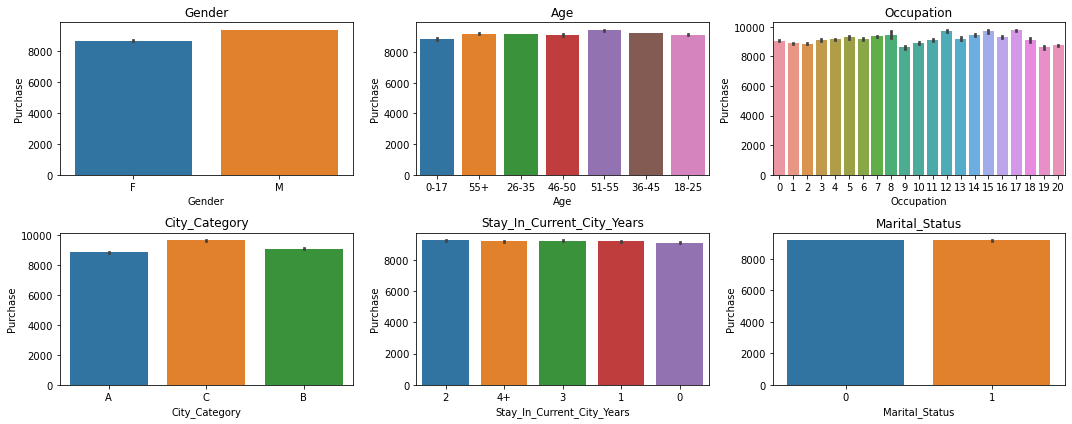

In [12]:
# Fig.6

fig, ax = plt.subplots(2,3, figsize=(15,6)) 

######## Gender ######### 
sns.barplot(x='Gender', y = 'Purchase', data = df, ax = ax[0, 0]) 
ax[0,0].set_title('Gender') 

######## Age ######### 
sns.barplot(x='Age', y = 'Purchase', data = df, ax = ax[0, 1]) 
ax[0,1].set_title('Age') 

######## Occupation ######### 
sns.barplot(x='Occupation', y = 'Purchase', data = df, ax = ax[0, 2]) 
ax[0,2].set_title('Occupation') 

######## City ######### 
sns.barplot(x='City_Category', y = 'Purchase', data = df,ax = ax[1, 0]) 
ax[1,0].set_title('City_Category') 

######## Years in city ######### 
sns.barplot(x='Stay_In_Current_City_Years', y = 'Purchase', data = df,ax = ax[1, 1]) 
ax[1,1].set_title('Stay_In_Current_City_Years') 

######## Marital Status ######### 
sns.barplot(x='Marital_Status', y = 'Purchase', data = df,ax = ax[1, 2]) 
ax[1,2].set_title('Marital_Status') 

plt.tight_layout() 
plt.show()

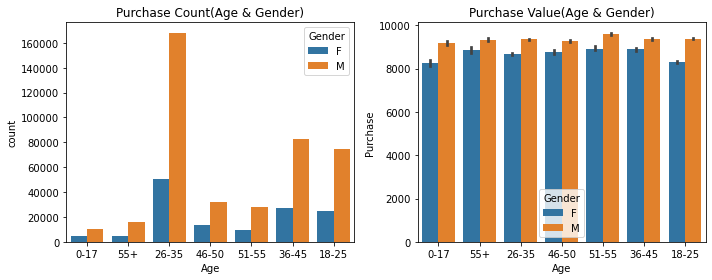

In [13]:
# Fig.7

# Generate a histogram by gender and age
fig, ax = plt.subplots(1,2, figsize=(10,4)) 

sns.countplot(x = 'Age', data = df, hue = 'Gender', ax = ax[0]) 
ax[0].set_title('Purchase Count(Age & Gender)') 
sns.barplot(x = 'Age', y = 'Purchase', data = df, hue = 'Gender', ax = ax[1]) 
ax[1].set_title('Purchase Value(Age & Gender)') 

plt.tight_layout() 
plt.show()

## Questoin 2

In [14]:
# Fig.8

col_names = ['Product_ID']
renames = ['Product']
results = []
for col_name, new_name in zip(col_names, renames):
    group = df[[col_name, 'Purchase']].groupby(col_name, as_index=False).agg('count')
    result = group.sort_values('Purchase', ascending=False)[:10]
    result.index = ['#{}'.format(x) for x in range(1,11)]
    results.append(result.rename(columns={col_name: new_name}))    
    
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline; padding-right: 3em !important;"'),raw=True)
display_side_by_side(*results)

,Product,Purchase
#1,P00265242,1880
#2,P00025442,1615
#3,P00110742,1612
#4,P00112142,1562
#5,P00057642,1470
#6,P00184942,1440
#7,P00046742,1438
#8,P00058042,1422
#9,P00059442,1406
#10,P00145042,1406


In [15]:
Product_Category_1_sum = df['Product_Category_1'].sum()
Product_Category_2_sum = df['Product_Category_2'].sum()

print("Profit from product of category 1 = ",Product_Category_1_sum)
print("Profit from product of category 2 = ",Product_Category_2_sum)

Profit from product of category 1 =  2944386
Profit from product of category 2 =  5404346


### Generate two bar charts to see the best-selling product in each category

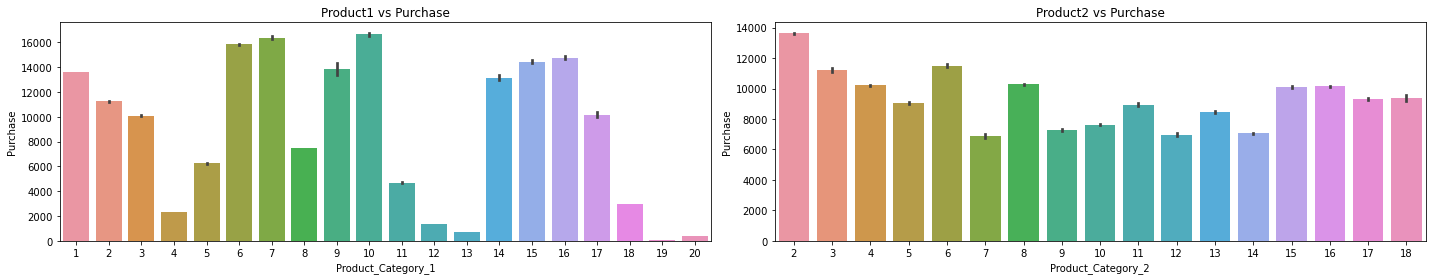

In [16]:
# Fig.9

fig, ax = plt.subplots(1, 2, figsize=(20,4)) 
 
sns.barplot(x = 'Product_Category_1', y = 'Purchase', data = df, ax = ax[0]) 
ax[0].set_title('Product1 vs Purchase') 

sns.barplot(x = 'Product_Category_2', y = 'Purchase', data = df, ax = ax[1]) 
ax[1].set_title('Product2 vs Purchase') 

plt.tight_layout()
plt.show()


In [17]:
# Fig.10

import random
color_mapping = {}
def random_color(val):    
    if val in color_mapping.keys():
        color = color_mapping[val]
    else:
        r = lambda: random.randint(0,255)
        color = 'rgba({}, {}, {}, 0.4)'.format(r(), r(), r())
        color_mapping[val] = color
    return 'background-color: %s' % color

occ_product_gb = df[['Occupation', 'Product_ID', 'Purchase']].groupby(['Occupation', 'Product_ID']).agg('count').rename(columns={'Purchase': 'count'})
occ_product_gb.sort_values('count', inplace=True, ascending=False)
result = pd.DataFrame({
    x: list(occ_product_gb.loc[x].index)[:5] for x in range(21)
}, index=['#{}'.format(x) for x in range(1,6)])
display(result.style.applymap(random_color))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
#1,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00112142,P00034742,P00145042,P00265242,P00057642,P00265242,P00265242,P00025442,P00265242,P00057642,P00265242,P00265242,P00265242
#2,P00110742,P00220442,P00025442,P00117942,P00110742,P00114942,P00110742,P00110742,P00242742,P00265242,P00242742,P00025442,P00112142,P00010742,P00184942,P00110742,P00046742,P00025442,P00010742,P00237542,P00059442
#3,P00025442,P00110742,P00058042,P00025442,P00112142,P00251242,P00058042,P00025442,P00127842,P00117442,P00112142,P00059442,P00265242,P00317842,P00025442,P00265242,P00255842,P00112142,P00080342,P00058042,P00220442
#4,P00057642,P00046742,P00110842,P00110842,P00025442,P00110742,P00031042,P00112142,P00117942,P00000142,P00025442,P00117942,P00025442,P00080342,P00237542,P00059442,P00025442,P00110742,P00058042,P00059442,P00110742
#5,P00112142,P00025442,P00059442,P00110742,P00237542,P00112542,P00255842,P00184942,P00114942,P00102642,P00255842,P00148642,P00242742,P00085242,P00110742,P00112142,P00034742,P00237542,P00057642,P00112142,P00025442


## Question 3

#### K-means Clustering

In [18]:
# Too many data : reduction
data = df.sample(frac=0.02, replace=True, random_state=1)
data_ = data.copy()

In [19]:
 # convert categorial features to numerical form
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["enc_Gender"] = le.fit_transform(data["Gender"])
data["enc_Age"] = le.fit_transform(data["Age"])
data["enc_City"] = le.fit_transform(data["City_Category"])
data["enc_years"] = le.fit_transform(data["Stay_In_Current_City_Years"])
data["enc_ProductID"] = le.fit_transform(data["Product_ID"])

data = data.drop(['Product_ID','Gender','City_Category', 'Age','Stay_In_Current_City_Years'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10948 entries, 128668 to 490747
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   User_ID             10948 non-null  int64
 1   Occupation          10948 non-null  int64
 2   Marital_Status      10948 non-null  int64
 3   Product_Category_1  10948 non-null  int64
 4   Product_Category_2  10948 non-null  int64
 5   Purchase            10948 non-null  int64
 6   enc_Gender          10948 non-null  int64
 7   enc_Age             10948 non-null  int64
 8   enc_City            10948 non-null  int64
 9   enc_years           10948 non-null  int64
 10  enc_ProductID       10948 non-null  int64
dtypes: int64(11)
memory usage: 1.0 MB


In [20]:
# Normalize the data for KMeans
from sklearn import preprocessing

x_scaled = preprocessing.MinMaxScaler().fit_transform(data.values)
df_scaled = pd.DataFrame(x_scaled,columns=data.columns, index=data.index)

In [21]:
#  Apply PCA by fitting the good data with only two dimensions
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_scaled)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create range of clusters 
range_n_clusters = list(range(2,11))
# Loop through clusters
for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # # Predict the cluster for each transformed sample data point
    # sample_preds = clusterer.predict(reduced_data)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.5945708888098279
For n_clusters = 3. The average silhouette_score is : 0.7830395713501085
For n_clusters = 4. The average silhouette_score is : 0.8739305863864538
For n_clusters = 5. The average silhouette_score is : 0.6992957440569705
For n_clusters = 6. The average silhouette_score is : 0.5818068166361965
For n_clusters = 7. The average silhouette_score is : 0.5260521155566128
For n_clusters = 8. The average silhouette_score is : 0.4686609631341945
For n_clusters = 9. The average silhouette_score is : 0.43041130978811976
For n_clusters = 10. The average silhouette_score is : 0.41114689817380706


In [23]:
# Best score when number of cluster is 4.
datavalues=reduced_data.values
model = KMeans(n_clusters=4)
labels = model.fit(datavalues).predict(datavalues)

In [24]:
data_['label'] = labels

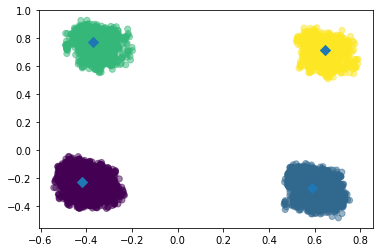

In [25]:
# Fig.11

# Assign the columns of new_points: xs and ys
xs = datavalues[:,0]
ys = datavalues[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

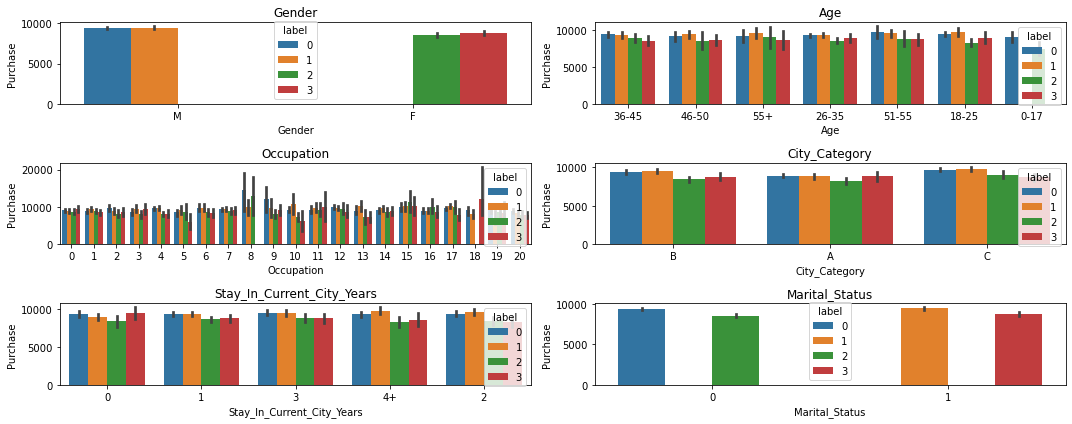

In [26]:
# Fig.12

fig, ax = plt.subplots(3, 2, figsize=(15,6)) 

######## Gender ######### 
sns.barplot(x='Gender', y = 'Purchase', data = data_, hue = 'label', ax = ax[0, 0]) 
ax[0, 0].set_title('Gender') 

######## Age ######### 
sns.barplot(x='Age', y = 'Purchase', data = data_, hue = 'label', ax = ax[0, 1]) 
ax[0, 1].set_title('Age') 

######## Occupation ######### 
sns.barplot(x='Occupation', y = 'Purchase', data = data_, hue = 'label', ax = ax[1, 0]) 
ax[1, 0].set_title('Occupation') 

######## City ######### 
sns.barplot(x='City_Category', y = 'Purchase', data = data_, hue = 'label', ax = ax[1, 1]) 
ax[1, 1].set_title('City_Category') 

######## Years in city ######### 
sns.barplot(x='Stay_In_Current_City_Years', y = 'Purchase', data = data_, hue = 'label', ax = ax[2, 0]) 
ax[2, 0].set_title('Stay_In_Current_City_Years') 

######## Marital Status ######### 
sns.barplot(x='Marital_Status', y = 'Purchase', data = data_, hue = 'label', ax = ax[2, 1]) 
ax[2, 1].set_title('Marital_Status') 

plt.tight_layout() 
plt.show()

In [27]:
Product_Category_1_sum = data_.groupby('label')['Product_Category_1'].sum()
Product_Category_2_sum = data_.groupby('label')['Product_Category_2'].sum()

print("Profit from product of category 1 = \n",Product_Category_1_sum)
print("Profit from product of category 2 = \n",Product_Category_2_sum)

Profit from product of category 1 = 
 label
0    26109
1    17382
2     9174
3     6464
Name: Product_Category_1, dtype: int64
Profit from product of category 2 = 
 label
0    48958
1    32309
2    15729
3    11003
Name: Product_Category_2, dtype: int64


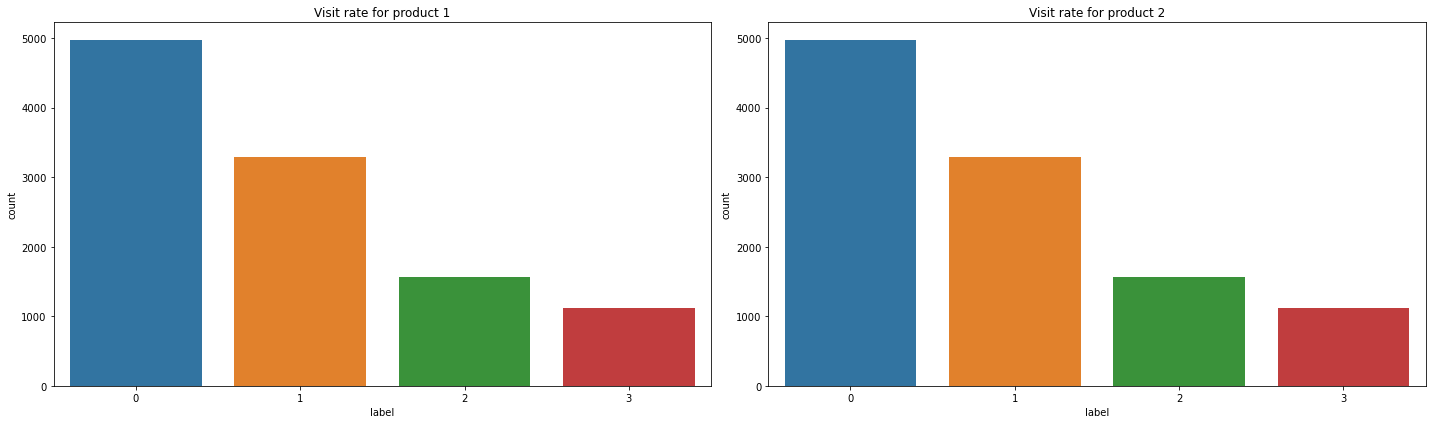

In [28]:
# Fig.13

fig, ax = plt.subplots(1, 2, figsize=(20,6)) 
 
sns.countplot(x = 'label', data = data_, ax = ax[0]) 
ax[0].set_title('Visit rate for product 1') 

sns.countplot(x = 'label', data = data_, ax = ax[1]) 
ax[1].set_title('Visit rate for product 2') 

plt.tight_layout()
plt.show()

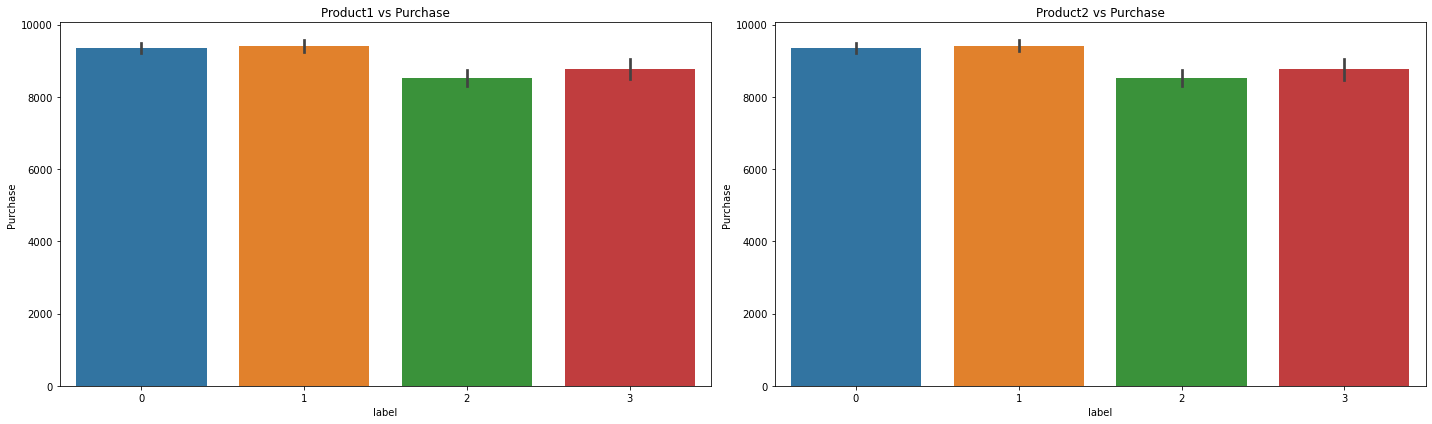

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20,6)) 
 
sns.barplot(x = 'label', y = 'Purchase', data = data_, ax = ax[0]) 
ax[0].set_title('Product1 vs Purchase') 

sns.barplot(x = 'label', y = 'Purchase', data = data_, ax = ax[1]) 
ax[1].set_title('Product2 vs Purchase') 

plt.tight_layout()
plt.show()

# Additional Question

<AxesSubplot:>

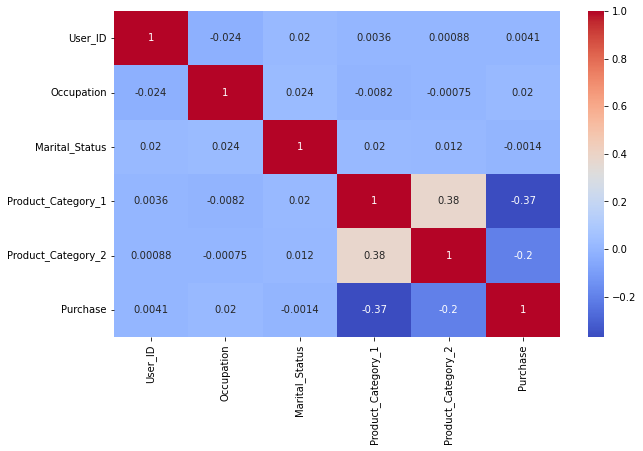

In [30]:
# Fig.14

plt.figure(plt.figure(figsize=(10, 6)))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')